Libraries are Imported

In [18]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize
from IPython.display import Image 
from IPython.core.display import HTML
import json
import lxml
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium
import folium

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


The variables that are used

In [3]:
CLIENT_ID = 'XXX'
CLIENT_SECRET = 'XXX'
ACCESS_TOKEN = 'XXX'
VERSION = '20200604'
LIMIT = 100
latitude = 40.920643
longitude = -73.879410
search_query = 'restaurant'
radius = 2000
print(search_query + ' .... OK!')

restaurant .... OK!


The data is created and organized

In [4]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

In [5]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
print(dataframe.shape)
dataframe

(50, 24)


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet,venuePage.id
0,5f6d1b284b5d241a2cb590df,Margarita's Restaurant Lounge,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1626933606,False,332 South Broadway,40.922106,-73.895851,"[{'label': 'display', 'lat': 40.9221058, 'lng'...",1392,...,United States,"[332 South Broadway, Yonkers, NY 10705]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4beaeb7ca9900f475a1f1740,Kam Fung Restaurant Chinese Food Take Out,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1626933606,False,112 Elm St,40.933846,-73.891800,"[{'label': 'display', 'lat': 40.93384552001953...",1801,...,United States,"[112 Elm St, Yonkers, NY 10701]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e4defcfbd41b76bef959ea5,Silvio's Italian Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1626933606,False,351 S Broadway,40.921458,-73.896273,"[{'label': 'display', 'lat': 40.921458, 'lng':...",1421,...,United States,"[351 S Broadway, Yonkers, NY 10705]",2510749,https://www.seamless.com/menu/silvios-italian-...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN
3,52228e4211d2ebf3cc5e70ad,Al Waha Restaurant,"[{'id': '4bf58dd8d48988d119941735', 'name': 'H...",v-1626933606,False,NaN,40.923159,-73.859466,"[{'label': 'display', 'lat': 40.92315901953162...",1700,...,United States,"[Yonkers, NY]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4e2fc0541f6ed9df90231eac,Sal's Restaurant,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1626933606,False,209 Nepperhan Ave,40.934675,-73.892258,"[{'label': 'display', 'lat': 40.934675, 'lng':...",1899,...,United States,"[209 Nepperhan Ave, Yonkers, NY 10701]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4d7d16ede04d6ea8edef06d6,Restaurante El Salvadoreño,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1626933606,False,297 S Broadway,40.923407,-73.895917,"[{'label': 'display', 'lat': 40.923407, 'lng':...",1422,...,United States,"[297 S Broadway (Ludlow St & South Broadway), ...",NaN,NaN,NaN,NaN,NaN,NaN,Ludlow St & South Broadway,NaN
6,4e4df184bd41b76bef95b824,Fu Hing Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1626933606,False,19 Palisade Ave,40.934464,-73.896523,"[{'label': 'display', 'lat': 40.93446350097656...",2106,...,United States,"[19 Palisade Ave, Yonkers, NY 10701]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4d9ca7748efaa143cd8e52b7,Giovanni's Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1626933606,False,25 Main St,40.934327,-73.899446,"[{'label': 'display', 'lat': 40.93432705, 'lng...",2271,...,United States,"[25 Main St, Yonkers, NY 10701]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4ee3fb8b61aff5a3416273ee,Empire Terrace Restaurant,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1626933606,False,810 Yonkers Ave,40.919707,-73.865318,"[{'label': 'display', 'lat': 40.91970656908228...",1189,...,United States,"[810 Yonkers Ave, Yonkers, NY 10704]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4c4ccf4039f9d13acb7c6094,New Hing Wong Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1626933606,False,417 Riverdale Ave,40.918091,-73.901840,"[{'label': 'display', 'lat': 40.9180908203125,...",1908,...,United States,"[417 Riverdale Ave, Yonkers, NY 10705]",1564451,https://www.seamless.com/menu/new-hing-wong-41...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN


In [6]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

print(dataframe_filtered.shape)
dataframe_filtered

(50, 15)


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Margarita's Restaurant Lounge,Mexican Restaurant,332 South Broadway,40.922106,-73.895851,"[{'label': 'display', 'lat': 40.9221058, 'lng'...",1392,10705,US,Yonkers,NY,United States,"[332 South Broadway, Yonkers, NY 10705]",NaN,5f6d1b284b5d241a2cb590df
1,Kam Fung Restaurant Chinese Food Take Out,Chinese Restaurant,112 Elm St,40.933846,-73.891800,"[{'label': 'display', 'lat': 40.93384552001953...",1801,10701,US,Yonkers,NY,United States,"[112 Elm St, Yonkers, NY 10701]",NaN,4beaeb7ca9900f475a1f1740
2,Silvio's Italian Restaurant,Italian Restaurant,351 S Broadway,40.921458,-73.896273,"[{'label': 'display', 'lat': 40.921458, 'lng':...",1421,10705,US,Yonkers,NY,United States,"[351 S Broadway, Yonkers, NY 10705]",NaN,4e4defcfbd41b76bef959ea5
3,Al Waha Restaurant,Hookah Bar,NaN,40.923159,-73.859466,"[{'label': 'display', 'lat': 40.92315901953162...",1700,NaN,US,Yonkers,NY,United States,"[Yonkers, NY]",NaN,52228e4211d2ebf3cc5e70ad
4,Sal's Restaurant,Mexican Restaurant,209 Nepperhan Ave,40.934675,-73.892258,"[{'label': 'display', 'lat': 40.934675, 'lng':...",1899,10701,US,Yonkers,NY,United States,"[209 Nepperhan Ave, Yonkers, NY 10701]",NaN,4e2fc0541f6ed9df90231eac
5,Restaurante El Salvadoreño,Restaurant,297 S Broadway,40.923407,-73.895917,"[{'label': 'display', 'lat': 40.923407, 'lng':...",1422,10705,US,Yonkers,NY,United States,"[297 S Broadway (Ludlow St & South Broadway), ...",Ludlow St & South Broadway,4d7d16ede04d6ea8edef06d6
6,Fu Hing Chinese Restaurant,Chinese Restaurant,19 Palisade Ave,40.934464,-73.896523,"[{'label': 'display', 'lat': 40.93446350097656...",2106,10701,US,Yonkers,NY,United States,"[19 Palisade Ave, Yonkers, NY 10701]",NaN,4e4df184bd41b76bef95b824
7,Giovanni's Restaurant,Italian Restaurant,25 Main St,40.934327,-73.899446,"[{'label': 'display', 'lat': 40.93432705, 'lng...",2271,10701,US,Yonkers,NY,United States,"[25 Main St, Yonkers, NY 10701]",NaN,4d9ca7748efaa143cd8e52b7
8,Empire Terrace Restaurant,American Restaurant,810 Yonkers Ave,40.919707,-73.865318,"[{'label': 'display', 'lat': 40.91970656908228...",1189,10704,US,Yonkers,NY,United States,"[810 Yonkers Ave, Yonkers, NY 10704]",NaN,4ee3fb8b61aff5a3416273ee
9,New Hing Wong Chinese Restaurant,Chinese Restaurant,417 Riverdale Ave,40.918091,-73.901840,"[{'label': 'display', 'lat': 40.9180908203125,...",1908,10705,US,Yonkers,NY,United States,"[417 Riverdale Ave, Yonkers, NY 10705]",NaN,4c4ccf4039f9d13acb7c6094


K means is used to cluster the data

In [7]:
k=5
cluster_df = dataframe_filtered[['lat','lng']]
kmeans = KMeans(n_clusters = k,random_state=0).fit(cluster_df)
print(kmeans.labels_)
dataframe_filtered.insert(0, 'Cluster Labels', kmeans.labels_)
dataframe_filtered.head()

[2 0 2 1 0 2 0 0 1 2 0 2 0 4 3 2 2 2 2 0 2 2 2 2 1 1 1 0 0 0 0 1 1 0 1 0 2
 2 0 2 2 0 0 0 0 0 0 3 0 1]


,Cluster Labels,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,2,Margarita's Restaurant Lounge,Mexican Restaurant,332 South Broadway,40.922106,-73.895851,"[{'label': 'display', 'lat': 40.9221058, 'lng'...",1392,10705,US,Yonkers,NY,United States,"[332 South Broadway, Yonkers, NY 10705]",NaN,5f6d1b284b5d241a2cb590df
1,0,Kam Fung Restaurant Chinese Food Take Out,Chinese Restaurant,112 Elm St,40.933846,-73.891800,"[{'label': 'display', 'lat': 40.93384552001953...",1801,10701,US,Yonkers,NY,United States,"[112 Elm St, Yonkers, NY 10701]",NaN,4beaeb7ca9900f475a1f1740
2,2,Silvio's Italian Restaurant,Italian Restaurant,351 S Broadway,40.921458,-73.896273,"[{'label': 'display', 'lat': 40.921458, 'lng':...",1421,10705,US,Yonkers,NY,United States,"[351 S Broadway, Yonkers, NY 10705]",NaN,4e4defcfbd41b76bef959ea5
3,1,Al Waha Restaurant,Hookah Bar,NaN,40.923159,-73.859466,"[{'label': 'display', 'lat': 40.92315901953162...",1700,NaN,US,Yonkers,NY,United States,"[Yonkers, NY]",NaN,52228e4211d2ebf3cc5e70ad
4,0,Sal's Restaurant,Mexican Restaurant,209 Nepperhan Ave,40.934675,-73.892258,"[{'label': 'display', 'lat': 40.934675, 'lng':...",1899,10701,US,Yonkers,NY,United States,"[209 Nepperhan Ave, Yonkers, NY 10701]",NaN,4e2fc0541f6ed9df90231eac


The best cluster is identified along with the cluster number and the location of it

In [17]:
cluster1 = dataframe_filtered.loc[dataframe_filtered['Cluster Labels'] == 0]
cluster2 = dataframe_filtered.loc[dataframe_filtered['Cluster Labels'] == 1]
cluster3 = dataframe_filtered.loc[dataframe_filtered['Cluster Labels'] == 2]
cluster4 = dataframe_filtered.loc[dataframe_filtered['Cluster Labels'] == 3]
cluster5 = dataframe_filtered.loc[dataframe_filtered['Cluster Labels'] == 4]

clusterDict = {"cluster1" : len(cluster1), "cluster2" : len(cluster2), "cluster3" : len(cluster3), "cluster4" : len(cluster4), "cluster5" : len(cluster5)}
clusterDict1 = {"cluster1" : cluster1, "cluster2" : cluster2, "cluster3" : cluster3, "cluster4" : cluster4, "cluster5" : cluster5}
biggestCluster = max(clusterDict, key=clusterDict.get)
print("biggest cluster: " + biggestCluster)
print("cluster number: " + str(len(clusterDict1['cluster1'])))
biggestCluster1 = clusterDict1[biggestCluster]

biggest cluster: cluster1
cluster number: 21


In [30]:
print("minimum latitude and longitude: " + str(min(biggestCluster1['lat'])) + ", " + str(min(biggestCluster1['lng'])))
print("maximum latitude and longitude: " + str(max(biggestCluster1['lat'])) + ", " + str(max(biggestCluster1['lng'])))

minimum latitude and longitude: 40.927764963320655, -73.90048221372605
maximum latitude and longitude: 40.9351692199707, -73.89179992675781


In [22]:
plotData = [['Cluster1', len(cluster1)], ['Cluster2', len(cluster2)], ['Cluster3', len(cluster3)], ['Cluster4', len(cluster4)], ['Cluster5', len(cluster5)]]
plotData_df = pd.DataFrame(plotData, columns = ['Cluster', 'ClusterLength'])
plotData_df

,Cluster,ClusterLength
0,Cluster1,21
1,Cluster2,9
2,Cluster3,17
3,Cluster4,2
4,Cluster5,1


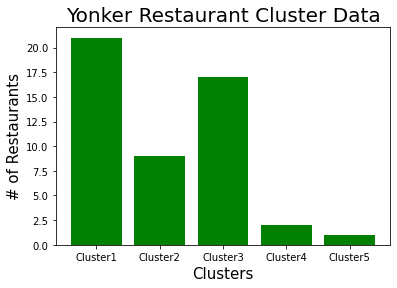

In [29]:
plt.bar(plotData_df['Cluster'], plotData_df['ClusterLength'], color='green')
plt.title('Yonker Restaurant Cluster Data', fontsize = 20)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('# of Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

A map of the clusters is displayed

In [10]:
df_map  = folium.Map(location=[40.920643,-73.879410],zoom_start=13)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, name, cluster in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['name'], dataframe_filtered['Cluster Labels']):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(df_map)
       
df_map

Map may not be visible so here's a link: https://gyazo.com/61a16c4972b040adcc8469bb6cadbc69